Advanced: Animations
============================

**NOTE:** this tutorial may take a while to load in a browser as there are many embedded animations.

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.1 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [2]:
!pip install -I "phoebe>=2.1,<2.2"

     |████████████████████████████████| 6.0MB 13.3MB/s 
     |████████████████████████████████| 17.0MB 242kB/s 
     |████████████████████████████████| 24.8MB 131kB/s 
     |████████████████████████████████| 6.1MB 31.6MB/s 
     |████████████████████████████████| 204kB 49.7MB/s 
     |████████████████████████████████| 583kB 54.8MB/s 
     |████████████████████████████████| 102kB 7.3MB/s 
     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
  Created wheel for phoebe: filename=phoebe-2.1.17-cp27-cp27mu-linux_x86_64.whl size=7504960 sha256=f3a8124e95d53008353c7d266550cb4608710008efcc1602d098cfca36d74806
  Stored in directory: /root/.cache/pip/wheels/bd/13/bf/38ad45f28a90238c16d5b7bf0d1f15151847d238b80104152b
Successfully built phoebe
ERROR: tensorflow 2.1.0 has requirement scipy==1.2.2; python_version < "3", but you'll have scipy 1.2.3 which is incompatible.
ERROR: tensorflow 2.1.0 has requirement tensorflow-estimator<2.2.0,>=2.1.0rc

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](./building_a_system.ipynb) for more details.

In [3]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

/usr/local/lib/python2.7/dist-packages/phoebe/__init__.py:56: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/usr/local/lib/python2.7/dist-packages

In [4]:
times = np.linspace(0,1,51)

In [5]:
b.add_dataset('lc', times=times, dataset='lc01')

<ParameterSet: 15 parameters | contexts: compute, dataset>

In [6]:
b.add_dataset('orb', times=times, dataset='orb01')

<ParameterSet: 3 parameters | contexts: compute, dataset>

In [7]:
b.add_dataset('mesh', times=times, dataset='mesh01', columns=['teffs'])

<ParameterSet: 4 parameters | contexts: compute, dataset>

In [8]:
b.run_compute(irrad_method='none')

<ParameterSet: 324 parameters | kinds: mesh, orb, lc>

Default Animations
-------------------------

By passing `animate=True` to [b.show()](../api/phoebe.parameters.ParameterSet.show.md), [b.savefig()](../api/phoebe.parameters.ParameterSet.savefig.md), or the final call to [b.plot()](../api/phoebe.parameters.ParameterSet.plot.md) along with `save=filename` or `show=True` will create an animation instead of a static plot.

Alternatively, you can call `afig.animate()` on the returned afig object returned by [b.plot()](../api/phoebe.parameters.ParameterSet.plot.md).

Sat, 16 Jan 2021 02:41 matplotlib.animation WARNING MovieWriter imagemagick unavailable.


RuntimeError: ignored

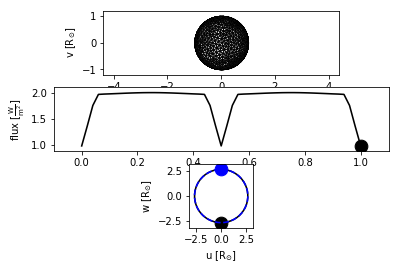

In [9]:
afig, mplanim = b.plot(y={'orb': 'ws'}, 
                       animate=True, save='animations_1.gif', save_kwargs={'writer': 'imagemagick'})

![animation](https://github.com/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations_1.gif?raw=1)

Note that like the rest of the examples below, this is simply the animated version of the exact same call to plot

Providing Times
-------------------

To override the default times explained above, pass a list or array to the times keyword.  For synthetic models, highlight mode will be enabled by default and the provided time does not need to be one that is computed - the value will be interpolated if it is not.  However, for plotting meshes, the exact time must be stored in the synthetic meshes or they will not be drawn.

This is especially usefully in cases where you may not want to repeat the first and last frame for a looping gif, or where you want a smoother animation by interpolation.  In this example we'll plot all but the last time so that the loop doesn't have a repeated frame.

In this example, times[:-1:2] means skip the last time and only use every-other time.

This option is not available from run_compute - a frame will be drawn for each computed time.

In [ ]:
afig, mplanim = b.plot(y={'orb': 'ws'},
                       times=times[:-1:2], animate=True, save='animations_2.gif', save_kwargs={'writer': 'imagemagick'})

![animation](https://github.com/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations_2.gif?raw=1)

Plotting Options
----------------------

By default, time highlighting is turned on.  See the [plotting tutorial](plotting) for details on 'highlight' and 'uncover' options.

Any additional arguments (colors, linestyle, etc) are passed to the plot call for EACH frame and for EVERY plotting call.

In [ ]:
afig, mplanim = b['lc01@model'].plot(times=times[:-1], uncover=True,\
                                     c='r', linestyle=':',\
                                     highlight_marker='s', highlight_color='g',
                                     animate=True, save='animations_3.gif', save_kwargs={'writer': 'imagemagick'})

![animation](https://github.com/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations_3.gif?raw=1)

In [ ]:
b['mesh01@model'].plot(times=times[:-1], fc='teffs', ec='None', 
                       animate=True, save='animations_4.gif', save_kwargs={'writer': 'imagemagick'})

![animation](https://github.com/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations_4.gif?raw=1)

Disabling Fixed Limits
-------------------------

By default, as can be seen above in the mesh animation, the limits of the axes are automatically set so that they are fixed throughout the animation.

Sometimes this may not be desired.  By setting `xlim='frame'` (and/or `ylim='frame'`), the axes limits are determined automatically per-frame instead of fixed throughout the animation.

For more information and other options see the [autofig tutorial on limits](http://nbviewer.jupyter.org/github/kecnry/autofig/blob/1.0.0/tutorials/limits.ipynb)

In [ ]:
b['lc01@model'].plot(times=times[:-1], uncover=True, xlim='frame',
                    animate=True, save='animations_5.gif', save_kwargs={'writer': 'imagemagick'})

![animation](https://github.com/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations_5.gif?raw=1)

3D axes
------------

Plotting to 3D axes are supported.  In addition to the options for static plots, animations also support passing a list for the range of elevation/azimuth (in degrees) throughout the animation.

In [ ]:
b['orb01@model'].plot(times=times[:-1], projection='3d', azim=[0, 360], elev=[-20,20],
                      animate=True, save='animations_6.gif', save_kwargs={'writer': 'imagemagick'})

![animation](https://github.com/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations_6.gif?raw=1)